# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

Base de dados e arquivos: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

Before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   50000 non-null  float64
 1   sexo                    49997 non-null  object 
 2   tempo_como_cliente      49998 non-null  float64
 3   frequencia_uso          50000 non-null  float64
 4   ligacoes_callcenter     50000 non-null  float64
 5   dias_atraso             50000 non-null  float64
 6   assinatura              50000 non-null  object 
 7   duracao_contrato        50000 non-null  object 
 8   total_gasto             50000 non-null  float64
 9   meses_ultima_interacao  50000 non-null  float64
 10  cancelou                50000 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.2+ MB
None
After cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49996 entries, 0 to 49999
Data columns (total 11 columns):
 # 

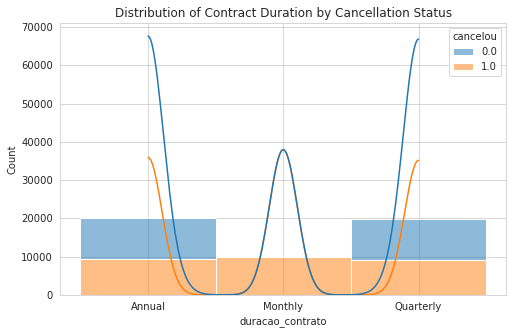

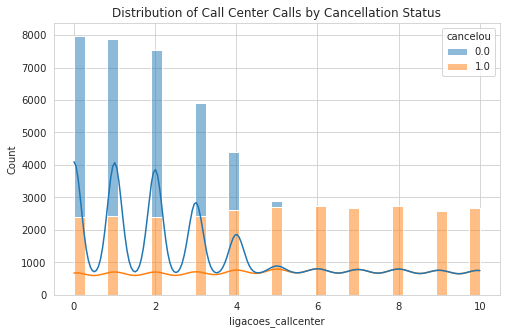

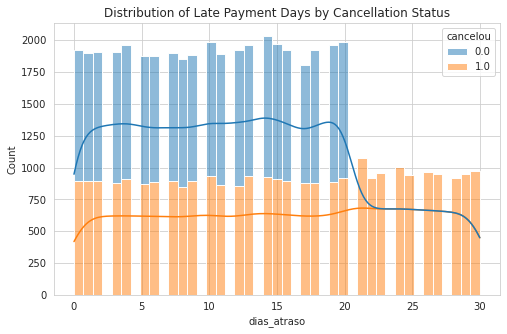


Cancellation counts after business rules:
0.0    21446
1.0     4821
Name: cancelou, dtype: int64

Cancellation percentages after business rules:
0.0    81.6%
1.0    18.4%
Name: cancelou, dtype: object


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
def load_data(filepath):
    """Load dataset and preprocess it."""
    df = pd.read_csv(filepath)
    df.drop(columns=["CustomerID"], inplace=True)
    return df

# Clean dataset
def clean_data(df):
    """Remove missing values from the dataset."""
    print("Before cleaning:")
    print(df.info())
    df.dropna(inplace=True)
    print("After cleaning:")
    print(df.info())
    return df

# Analyze cancellations
def analyze_cancellations(df):
    """Analyze and display cancellation statistics."""
    print("Cancellation counts:")
    print(df["cancelou"].value_counts())
    print("\nCancellation percentages:")
    print(df["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

# Apply business rules to reduce cancellations
def apply_business_rules(df):
    """Apply business rules to filter customers and analyze impact on cancellations."""
    df_filtered = df[(df["duracao_contrato"] != "Monthly") &
                     (df["ligacoes_callcenter"] <= 4) &
                     (df["dias_atraso"] <= 20)]
    
    print("\nCancellation counts after business rules:")
    print(df_filtered["cancelou"].value_counts())
    print("\nCancellation percentages after business rules:")
    print(df_filtered["cancelou"].value_counts(normalize=True).map("{:.1%}".format))
    
    return df_filtered

# Function to generate plots
def plot_distributions(df):
    """Generate histograms for each column grouped by cancellation status."""
    sns.set_style("whitegrid")

    # 1. Histogram for 'duracao_contrato'
    plt.figure(figsize=(8, 5))
    sns.histplot(df, x="duracao_contrato", hue="cancelou", multiple="stack", kde=True)
    plt.title("Distribution of Contract Duration by Cancellation Status")
    plt.show()

    # 2. Histogram for 'ligacoes_callcenter'
    plt.figure(figsize=(8, 5))
    sns.histplot(df, x="ligacoes_callcenter", hue="cancelou", multiple="stack", kde=True)
    plt.title("Distribution of Call Center Calls by Cancellation Status")
    plt.show()

    # 3. Histogram for 'dias_atraso'
    plt.figure(figsize=(8, 5))
    sns.histplot(df, x="dias_atraso", hue="cancelou", multiple="stack", kde=True)
    plt.title("Distribution of Late Payment Days by Cancellation Status")
    plt.show()

# Main execution
if __name__ == "__main__":
    file_path = "/home/rahima/JP/cancelamentos_sample.csv"
    data = load_data(file_path)
    data = clean_data(data)
    analyze_cancellations(data)
    plot_distributions(data)  # Generate the plots
    filtered_data = apply_business_rules(data)
